In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
import math

from utils import modeling 
from utils import analysis_pipeline

In [3]:
# sample1 = modeling.sample(0,1,2)
# sample2 = modeling.sample(1,1,2)
# print(sample1,sample2)

In [4]:
# decision1 = modeling.decision(sample1,0.5)
# decision2 = modeling.decision(sample2,0.5)
# print(decision1,decision2)

In [5]:
# print(modeling.accuracy([0,0],decision1))
# print(modeling.accuracy([1,1],decision2))

In [6]:
# ground_truth = [2,1]
# print(modeling.accuracy(ground_truth,modeling.decision(modeling.sample(0,1,2),0.4)))
# print(modeling.accuracy(ground_truth,modeling.decision(modeling.sample(0.5,1,2),0.4)))

In [7]:
set_sizes = np.random.randint(3,6,2000)
df = pd.DataFrame(set_sizes, columns=['set_size'])
df


,set_size
0,5
1,4
2,3
3,4
4,3
...,...
1995,5
1996,3
1997,5
1998,3


In [8]:
stimulus = []
for (row_index,row_data) in df.iterrows():
    stimulus.append(modeling.generate_stim(row_data['set_size']))

df['stim'] = stimulus

In [9]:
mean = []
for (row_index,row_data) in df.iterrows():
    mean.append(modeling.generate_mean(row_data['set_size']))

df['mean'] = mean

In [10]:
cue = []
for (row_index,row_data) in df.iterrows():
    cue.append(modeling.cue(row_data['stim']))

df['cue'] = cue

In [11]:
df

,set_size,stim,mean,cue
0,5,"[0.9839472777476805, 0.43266873576809917, 0.38...",1.400000,2
1,4,"[0.5157739084019437, 0.616896573922851, 0.3472...",1.750000,3
2,3,"[0.45058174421963637, 0.03195855941195114, 0.3...",2.333333,2
3,4,"[0.9211024346351446, 0.5311087059898646, 0.631...",1.750000,0
4,3,"[0.6900979919373016, 0.8703647896067168, 0.306...",2.333333,2
...,...,...,...,...
1995,5,"[0.03476004848061176, 0.7785719571695443, 0.44...",1.400000,3
1996,3,"[0.8257698709029585, 0.2026496137761591, 0.915...",2.333333,1
1997,5,"[0.2399027765018268, 0.4822910160717627, 0.713...",1.400000,4
1998,3,"[0.6220749394118239, 0.5316297698983563, 0.016...",2.333333,2


In [12]:
sample = []
for (row_index,row_data) in df.iterrows():
    sample.append(modeling.sample(0.5,0.4))

df['sample'] = sample

In [13]:
decision = []
guessing = []
for (row_index,row_data) in df.iterrows():
    if row_data['sample'] < 0.5:
        guessing.append(1)
    else:
        guessing.append(0)
    decision.append(modeling.decision_random(row_data['stim'],row_data['sample'],row_data['cue'],1))

df['decision'] = decision
df['guessing'] = guessing

In [14]:
df

,set_size,stim,mean,cue,sample,decision,guessing
0,5,"[0.9839472777476805, 0.43266873576809917, 0.38...",1.400000,2,0.411941,0.214543,1
1,4,"[0.5157739084019437, 0.616896573922851, 0.3472...",1.750000,3,1.317064,1.550177,0
2,3,"[0.45058174421963637, 0.03195855941195114, 0.3...",2.333333,2,-0.129421,0.268587,1
3,4,"[0.9211024346351446, 0.5311087059898646, 0.631...",1.750000,0,0.902942,0.188130,0
4,3,"[0.6900979919373016, 0.8703647896067168, 0.306...",2.333333,2,0.719135,0.335242,0
...,...,...,...,...,...,...,...
1995,5,"[0.03476004848061176, 0.7785719571695443, 0.44...",1.400000,3,0.898644,0.919770,0
1996,3,"[0.8257698709029585, 0.2026496137761591, 0.915...",2.333333,1,-0.023818,0.144870,1
1997,5,"[0.2399027765018268, 0.4822910160717627, 0.713...",1.400000,4,-0.016752,0.611683,1
1998,3,"[0.6220749394118239, 0.5316297698983563, 0.016...",2.333333,2,0.617190,0.092133,0


<Axes: ylabel='Frequency'>

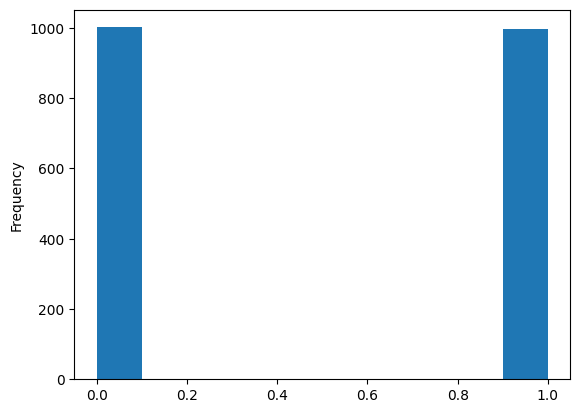

In [15]:
df['guessing'].plot(kind="hist")

In [16]:
df

,set_size,stim,mean,cue,sample,decision,guessing
0,5,"[0.9839472777476805, 0.43266873576809917, 0.38...",1.400000,2,0.411941,0.214543,1
1,4,"[0.5157739084019437, 0.616896573922851, 0.3472...",1.750000,3,1.317064,1.550177,0
2,3,"[0.45058174421963637, 0.03195855941195114, 0.3...",2.333333,2,-0.129421,0.268587,1
3,4,"[0.9211024346351446, 0.5311087059898646, 0.631...",1.750000,0,0.902942,0.188130,0
4,3,"[0.6900979919373016, 0.8703647896067168, 0.306...",2.333333,2,0.719135,0.335242,0
...,...,...,...,...,...,...,...
1995,5,"[0.03476004848061176, 0.7785719571695443, 0.44...",1.400000,3,0.898644,0.919770,0
1996,3,"[0.8257698709029585, 0.2026496137761591, 0.915...",2.333333,1,-0.023818,0.144870,1
1997,5,"[0.2399027765018268, 0.4822910160717627, 0.713...",1.400000,4,-0.016752,0.611683,1
1998,3,"[0.6220749394118239, 0.5316297698983563, 0.016...",2.333333,2,0.617190,0.092133,0


In [17]:
# ground_truth = []
# for (row_index,row_data) in df.iterrows():
#     ground_truth.append(1)

# df['ground_truth'] = ground_truth

In [18]:
df

,set_size,stim,mean,cue,sample,decision,guessing
0,5,"[0.9839472777476805, 0.43266873576809917, 0.38...",1.400000,2,0.411941,0.214543,1
1,4,"[0.5157739084019437, 0.616896573922851, 0.3472...",1.750000,3,1.317064,1.550177,0
2,3,"[0.45058174421963637, 0.03195855941195114, 0.3...",2.333333,2,-0.129421,0.268587,1
3,4,"[0.9211024346351446, 0.5311087059898646, 0.631...",1.750000,0,0.902942,0.188130,0
4,3,"[0.6900979919373016, 0.8703647896067168, 0.306...",2.333333,2,0.719135,0.335242,0
...,...,...,...,...,...,...,...
1995,5,"[0.03476004848061176, 0.7785719571695443, 0.44...",1.400000,3,0.898644,0.919770,0
1996,3,"[0.8257698709029585, 0.2026496137761591, 0.915...",2.333333,1,-0.023818,0.144870,1
1997,5,"[0.2399027765018268, 0.4822910160717627, 0.713...",1.400000,4,-0.016752,0.611683,1
1998,3,"[0.6220749394118239, 0.5316297698983563, 0.016...",2.333333,2,0.617190,0.092133,0


In [19]:
df['decision_rad'] = analysis_pipeline.rad_convert(df['decision'])

In [20]:
normalized_decision = []

for (row_index,row_data) in df.iterrows():
    normalized_decision.append(modeling.normalize_decision(abs(row_data['decision_rad'])))

df['normalized_decision'] = normalized_decision

In [21]:
print(df.to_string())

      set_size                                                                                                        stim      mean  cue    sample  decision  guessing  decision_rad  normalized_decision
0            5    [0.9839472777476805, 0.43266873576809917, 0.38105381215709266, 0.12821532762551535, 0.21685612144554933]  1.400000    2  0.411941  0.214543         1      1.348014             1.348014
1            4                             [0.5157739084019437, 0.616896573922851, 0.3472689603261352, 0.5961689182237656]  1.750000    3  1.317064  1.550177         0      9.740051             3.456866
2            3                                              [0.45058174421963637, 0.03195855941195114, 0.3951130103980496]  2.333333    2 -0.129421  0.268587         1      1.687583             1.687583
3            4                            [0.9211024346351446, 0.5311087059898646, 0.6315338986455125, 0.4863748685157977]  1.750000    0  0.902942  0.188130         0      1.182053       

In [22]:
stim_rad = []

for (row_index,row_data) in df.iterrows():
    buffer = []
    for value in row_data['stim']:
        buffer.append(analysis_pipeline.rad_convert(value))
    stim_rad.append(buffer)

df['stim_rad'] =  stim_rad

In [23]:
df

,set_size,stim,mean,cue,sample,decision,guessing,decision_rad,normalized_decision,stim_rad
0,5,"[0.9839472777476805, 0.43266873576809917, 0.38...",1.400000,2,0.411941,0.214543,1,1.348014,1.348014,"[6.182323078583578, 2.7185378434540874, 2.3942..."
1,4,"[0.5157739084019437, 0.616896573922851, 0.3472...",1.750000,3,1.317064,1.550177,0,9.740051,3.456866,"[3.240703043097682, 3.876075489321483, 2.18195..."
2,3,"[0.45058174421963637, 0.03195855941195114, 0.3...",2.333333,2,-0.129421,0.268587,1,1.687583,1.687583,"[2.8310885949641698, 0.20080155093579727, 2.48..."
3,4,"[0.9211024346351446, 0.5311087059898646, 0.631...",1.750000,0,0.902942,0.188130,0,1.182053,1.182053,"[5.787457283706886, 3.33705441799068, 3.968044..."
4,3,"[0.6900979919373016, 0.8703647896067168, 0.306...",2.333333,2,0.719135,0.335242,0,2.106390,2.106390,"[4.33601356345459, 5.468663257943375, 1.927319..."
...,...,...,...,...,...,...,...,...,...,...
1995,5,"[0.03476004848061176, 0.7785719571695443, 0.44...",1.400000,3,0.898644,0.919770,0,5.779085,5.779085,"[0.2184038258902299, 4.891911881869735, 2.8078..."
1996,3,"[0.8257698709029585, 0.2026496137761591, 0.915...",2.333333,1,-0.023818,0.144870,1,0.910244,0.910244,"[5.188465119969052, 1.2732850757839806, 5.7547..."
1997,5,"[0.2399027765018268, 0.4822910160717627, 0.713...",1.400000,4,-0.016752,0.611683,1,3.843318,3.843318,"[1.5073536004678663, 3.0303238259668133, 4.480..."
1998,3,"[0.6220749394118239, 0.5316297698983563, 0.016...",2.333333,2,0.617190,0.092133,0,0.578888,0.578888,"[3.908612119277003, 3.3403283590846167, 0.1061..."


In [24]:
choice = []
for (row_index,row_data) in df.iterrows():
    choice.append(modeling.find_stim_choice(row_data['stim_rad'],row_data['decision_rad']))
    
df['choice'] = choice

In [25]:
df

,set_size,stim,mean,cue,sample,decision,guessing,decision_rad,normalized_decision,stim_rad,choice
0,5,"[0.9839472777476805, 0.43266873576809917, 0.38...",1.400000,2,0.411941,0.214543,1,1.348014,1.348014,"[6.182323078583578, 2.7185378434540874, 2.3942...",NaN
1,4,"[0.5157739084019437, 0.616896573922851, 0.3472...",1.750000,3,1.317064,1.550177,0,9.740051,3.456866,"[3.240703043097682, 3.876075489321483, 2.18195...",NaN
2,3,"[0.45058174421963637, 0.03195855941195114, 0.3...",2.333333,2,-0.129421,0.268587,1,1.687583,1.687583,"[2.8310885949641698, 0.20080155093579727, 2.48...",NaN
3,4,"[0.9211024346351446, 0.5311087059898646, 0.631...",1.750000,0,0.902942,0.188130,0,1.182053,1.182053,"[5.787457283706886, 3.33705441799068, 3.968044...",3.0
4,3,"[0.6900979919373016, 0.8703647896067168, 0.306...",2.333333,2,0.719135,0.335242,0,2.106390,2.106390,"[4.33601356345459, 5.468663257943375, 1.927319...",1.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,5,"[0.03476004848061176, 0.7785719571695443, 0.44...",1.400000,3,0.898644,0.919770,0,5.779085,5.779085,"[0.2184038258902299, 4.891911881869735, 2.8078...",4.0
1996,3,"[0.8257698709029585, 0.2026496137761591, 0.915...",2.333333,1,-0.023818,0.144870,1,0.910244,0.910244,"[5.188465119969052, 1.2732850757839806, 5.7547...",NaN
1997,5,"[0.2399027765018268, 0.4822910160717627, 0.713...",1.400000,4,-0.016752,0.611683,1,3.843318,3.843318,"[1.5073536004678663, 3.0303238259668133, 4.480...",NaN
1998,3,"[0.6220749394118239, 0.5316297698983563, 0.016...",2.333333,2,0.617190,0.092133,0,0.578888,0.578888,"[3.908612119277003, 3.3403283590846167, 0.1061...",2.0


In [26]:
accuracy = []
for (row_index,row_data) in df.iterrows():
    accuracy.append(modeling.accuracy(row_data['cue'],row_data['choice']))
    
df['correct'] = accuracy

In [27]:
df

,set_size,stim,mean,cue,sample,decision,guessing,decision_rad,normalized_decision,stim_rad,choice,correct
0,5,"[0.9839472777476805, 0.43266873576809917, 0.38...",1.400000,2,0.411941,0.214543,1,1.348014,1.348014,"[6.182323078583578, 2.7185378434540874, 2.3942...",NaN,0
1,4,"[0.5157739084019437, 0.616896573922851, 0.3472...",1.750000,3,1.317064,1.550177,0,9.740051,3.456866,"[3.240703043097682, 3.876075489321483, 2.18195...",NaN,0
2,3,"[0.45058174421963637, 0.03195855941195114, 0.3...",2.333333,2,-0.129421,0.268587,1,1.687583,1.687583,"[2.8310885949641698, 0.20080155093579727, 2.48...",NaN,0
3,4,"[0.9211024346351446, 0.5311087059898646, 0.631...",1.750000,0,0.902942,0.188130,0,1.182053,1.182053,"[5.787457283706886, 3.33705441799068, 3.968044...",3.0,0
4,3,"[0.6900979919373016, 0.8703647896067168, 0.306...",2.333333,2,0.719135,0.335242,0,2.106390,2.106390,"[4.33601356345459, 5.468663257943375, 1.927319...",1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5,"[0.03476004848061176, 0.7785719571695443, 0.44...",1.400000,3,0.898644,0.919770,0,5.779085,5.779085,"[0.2184038258902299, 4.891911881869735, 2.8078...",4.0,0
1996,3,"[0.8257698709029585, 0.2026496137761591, 0.915...",2.333333,1,-0.023818,0.144870,1,0.910244,0.910244,"[5.188465119969052, 1.2732850757839806, 5.7547...",NaN,0
1997,5,"[0.2399027765018268, 0.4822910160717627, 0.713...",1.400000,4,-0.016752,0.611683,1,3.843318,3.843318,"[1.5073536004678663, 3.0303238259668133, 4.480...",NaN,0
1998,3,"[0.6220749394118239, 0.5316297698983563, 0.016...",2.333333,2,0.617190,0.092133,0,0.578888,0.578888,"[3.908612119277003, 3.3403283590846167, 0.1061...",2.0,1


<Axes: title={'center': 'Set Size Effect on Accuracy'}, xlabel='Set Size', ylabel='Accuracy'>

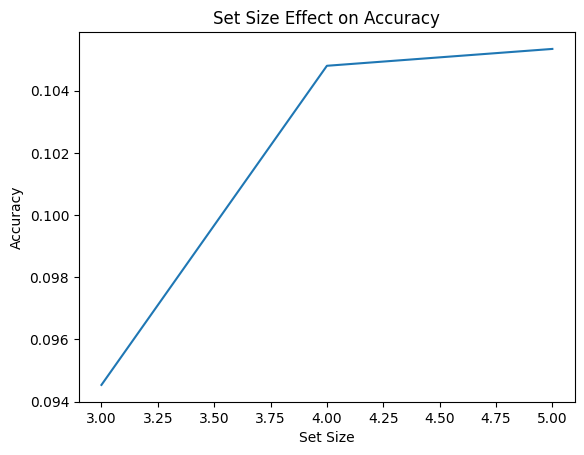

In [28]:
df.groupby('set_size').correct.mean().plot(xlabel= 'Set Size', ylabel= 'Accuracy', title='Set Size Effect on Accuracy')

In [29]:
ang_dist = []
for (row_index,row_data) in df.iterrows():
    ang_dist.append(analysis_pipeline.find_angular_dist(row_data['stim_rad'][row_data['cue']],row_data['decision_rad']))
    
df['precision_difference_0'] = ang_dist

In [30]:
df

,set_size,stim,mean,cue,sample,decision,guessing,decision_rad,normalized_decision,stim_rad,choice,correct,precision_difference_0
0,5,"[0.9839472777476805, 0.43266873576809917, 0.38...",1.400000,2,0.411941,0.214543,1,1.348014,1.348014,"[6.182323078583578, 2.7185378434540874, 2.3942...",NaN,0,-1.046217
1,4,"[0.5157739084019437, 0.616896573922851, 0.3472...",1.750000,3,1.317064,1.550177,0,9.740051,3.456866,"[3.240703043097682, 3.876075489321483, 2.18195...",NaN,0,-0.288974
2,3,"[0.45058174421963637, 0.03195855941195114, 0.3...",2.333333,2,-0.129421,0.268587,1,1.687583,1.687583,"[2.8310885949641698, 0.20080155093579727, 2.48...",NaN,0,-0.794985
3,4,"[0.9211024346351446, 0.5311087059898646, 0.631...",1.750000,0,0.902942,0.188130,0,1.182053,1.182053,"[5.787457283706886, 3.33705441799068, 3.968044...",3.0,0,1.677781
4,3,"[0.6900979919373016, 0.8703647896067168, 0.306...",2.333333,2,0.719135,0.335242,0,2.106390,2.106390,"[4.33601356345459, 5.468663257943375, 1.927319...",1.0,0,0.179070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5,"[0.03476004848061176, 0.7785719571695443, 0.44...",1.400000,3,0.898644,0.919770,0,5.779085,5.779085,"[0.2184038258902299, 4.891911881869735, 2.8078...",4.0,0,-2.075009
1996,3,"[0.8257698709029585, 0.2026496137761591, 0.915...",2.333333,1,-0.023818,0.144870,1,0.910244,0.910244,"[5.188465119969052, 1.2732850757839806, 5.7547...",NaN,0,-0.363041
1997,5,"[0.2399027765018268, 0.4822910160717627, 0.713...",1.400000,4,-0.016752,0.611683,1,3.843318,3.843318,"[1.5073536004678663, 3.0303238259668133, 4.480...",NaN,0,2.705544
1998,3,"[0.6220749394118239, 0.5316297698983563, 0.016...",2.333333,2,0.617190,0.092133,0,0.578888,0.578888,"[3.908612119277003, 3.3403283590846167, 0.1061...",2.0,1,0.472736


<Axes: title={'center': 'Set Size Effect on Precision'}, xlabel='Set Size', ylabel='Angular Distance from Target (rad)'>

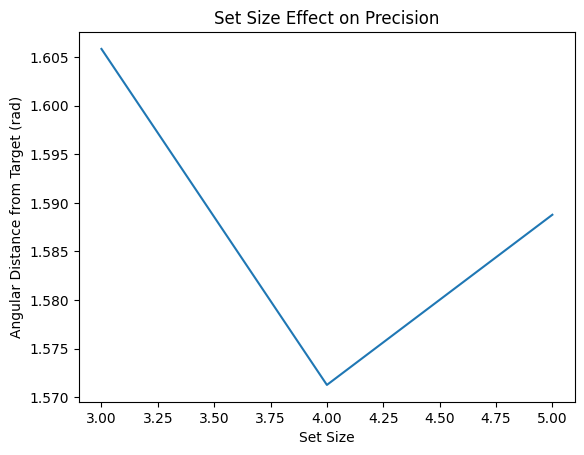

In [31]:
df['precision_difference_0_abs'] = df['precision_difference_0'].abs()

df.groupby('set_size').precision_difference_0_abs.mean().plot(xlabel= 'Set Size', ylabel= 'Angular Distance from Target (rad)', title='Set Size Effect on Precision')

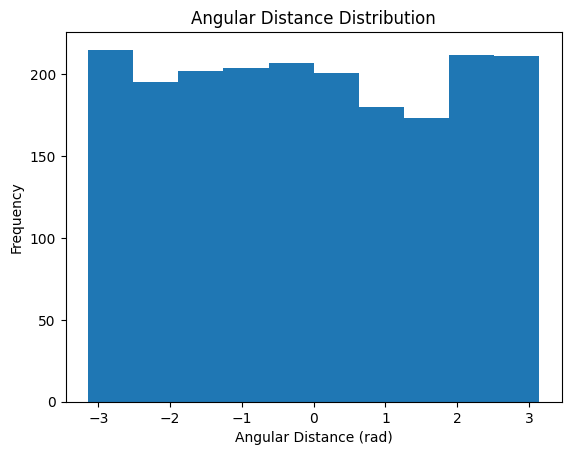

In [32]:
analysis_pipeline.plot_hist('precision_difference_0',df,'Angular Distance (rad)','Angular Distance Distribution')

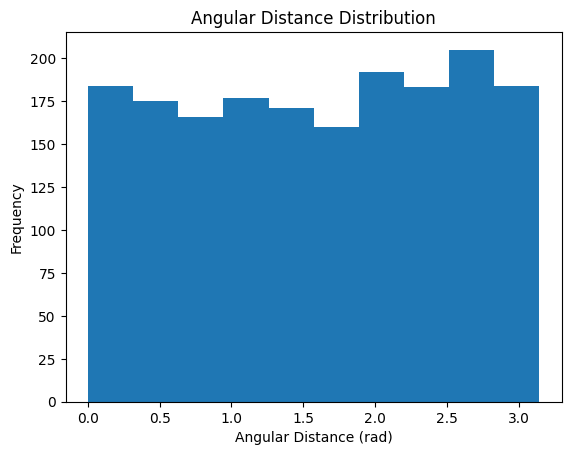

In [33]:
incorrect_df = df[df['correct'] == 0]
analysis_pipeline.plot_hist('precision_difference_0_abs',incorrect_df,'Angular Distance (rad)','Angular Distance Distribution')

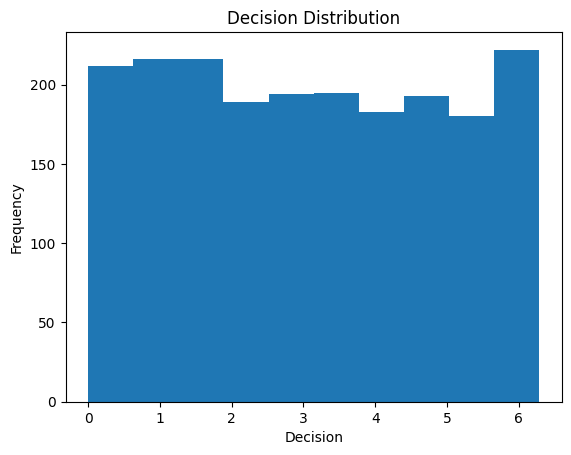

In [34]:
analysis_pipeline.plot_hist('normalized_decision',df,'Decision','Decision Distribution')

In [38]:
choice = []
for (row_index,row_data) in df.iterrows():
    if math.isnan(row_data['choice']) == True:
        choice.append(row_data['choice'])
    else:
        choice.append(math.trunc(row_data['choice']))

df['choice'] = choice

In [39]:
df

,set_size,stim,mean,cue,sample,decision,guessing,decision_rad,normalized_decision,stim_rad,choice,correct,precision_difference_0,precision_difference_0_abs
0,5,"[0.9839472777476805, 0.43266873576809917, 0.38...",1.400000,2,0.411941,0.214543,1,1.348014,1.348014,"[6.182323078583578, 2.7185378434540874, 2.3942...",NaN,0,-1.046217,1.046217
1,4,"[0.5157739084019437, 0.616896573922851, 0.3472...",1.750000,3,1.317064,1.550177,0,9.740051,3.456866,"[3.240703043097682, 3.876075489321483, 2.18195...",NaN,0,-0.288974,0.288974
2,3,"[0.45058174421963637, 0.03195855941195114, 0.3...",2.333333,2,-0.129421,0.268587,1,1.687583,1.687583,"[2.8310885949641698, 0.20080155093579727, 2.48...",NaN,0,-0.794985,0.794985
3,4,"[0.9211024346351446, 0.5311087059898646, 0.631...",1.750000,0,0.902942,0.188130,0,1.182053,1.182053,"[5.787457283706886, 3.33705441799068, 3.968044...",3.0,0,1.677781,1.677781
4,3,"[0.6900979919373016, 0.8703647896067168, 0.306...",2.333333,2,0.719135,0.335242,0,2.106390,2.106390,"[4.33601356345459, 5.468663257943375, 1.927319...",1.0,0,0.179070,0.179070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5,"[0.03476004848061176, 0.7785719571695443, 0.44...",1.400000,3,0.898644,0.919770,0,5.779085,5.779085,"[0.2184038258902299, 4.891911881869735, 2.8078...",4.0,0,-2.075009,2.075009
1996,3,"[0.8257698709029585, 0.2026496137761591, 0.915...",2.333333,1,-0.023818,0.144870,1,0.910244,0.910244,"[5.188465119969052, 1.2732850757839806, 5.7547...",NaN,0,-0.363041,0.363041
1997,5,"[0.2399027765018268, 0.4822910160717627, 0.713...",1.400000,4,-0.016752,0.611683,1,3.843318,3.843318,"[1.5073536004678663, 3.0303238259668133, 4.480...",NaN,0,2.705544,2.705544
1998,3,"[0.6220749394118239, 0.5316297698983563, 0.016...",2.333333,2,0.617190,0.092133,0,0.578888,0.578888,"[3.908612119277003, 3.3403283590846167, 0.1061...",2.0,1,0.472736,0.472736


In [40]:
ang_dist = []
for (row_index,row_data) in df.iterrows():
    if math.isnan(row_data['choice']):
        ang_dist.append(None)
    else:
        ang_dist.append(analysis_pipeline.find_angular_dist(row_data['stim_rad'][row_data['choice']],row_data['decision_rad']))
df['precision_difference_choice'] = ang_dist

TypeError: list indices must be integers or slices, not float